# YouTube Downloader

Choose a sample video from online: https://youtu.be/E1q0yIW0O74 ([Original Link](https://www.tagesschau.de/multimedia/sendung/ts-33043.html))

In [1]:
video_id = "E1q0yIW0O74"
output_name = f"{video_id}.wav"

In [2]:
import os
import io
import librosa
import numpy as np
import soundfile as sf
from pytube import YouTube
from pydub import AudioSegment

os.remove(output_name) if os.path.isfile(output_name) else None

## Display Video

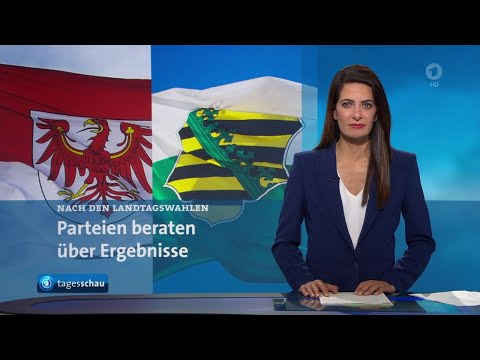

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id, width=400)

In [4]:
%%time

# use "allow_oauth_cache" option with pytube
yt = YouTube(f"https://youtu.be/{video_id}", allow_oauth_cache=True)
stream = yt.streams.filter(only_audio=True).first()

# download audio stream into memory
buffer = io.BytesIO()
stream = yt.streams.filter(only_audio=True).first()
stream.stream_to_buffer(buffer)

# convert stream from bytes into mono AudioSegment object
audio = AudioSegment.from_file(io.BytesIO(buffer.getvalue()), format="mp4")
audio = audio.set_channels(1)

# resample audio to 16 KHz and save it as 16-bit PCM
new_sr = 16000
data = audio.raw_data
data_float = librosa.util.buf_to_float(data, n_bytes=2, dtype=np.int16)
data_resampled = librosa.resample(data_float.T, orig_sr=audio.frame_rate, target_sr=new_sr)
sf.write(output_name, data_resampled.T, new_sr, "PCM_16")

# clean up temporary files
buffer.close()

CPU times: user 11.3 s, sys: 1.81 s, total: 13.1 s
Wall time: 14.8 s


In [5]:
!soxi {output_name}


Input File     : 'E1q0yIW0O74.wav'
Channels       : 1
Sample Rate    : 16000
Precision      : 16-bit
Duration       : 00:14:40.92 = 14094699 samples ~ 66068.9 CDDA sectors
File Size      : 28.2M
Bit Rate       : 256k
Sample Encoding: 16-bit Signed Integer PCM

